In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
plt.style.use('fivethirtyeight')

In [4]:
def computecost(x,y,theta):
    return ((1/2*len(x))*np.sum((np.dot(x,theta)-y)**2))  #return scalar value

In [56]:
def gredientdescitr(x,y,theta,alpha,num_iters):   #gredient descent function for one variable
    temp0 = 0
    temp1 = 0
    t = np.zeros((int(num_iters),2)) #contain history of theta values
    j_history = np.zeros((int(num_iters),1))  #contain history of cost function
    for i in range(num_iters):
        
        temp0 = theta[0]-alpha*((1/len(y))*np.sum((theta[0]+theta[1]*x)-y))
        temp1 = theta[1]-alpha*((1/len(y))*np.sum(((theta[0]+theta[1]*x)-y)*x))
        theta[0] = temp0
        t[i][0] = temp0
        theta[1] = temp1
        t[i][1] = temp1
        j_history[i] = computecost(x,y,theta)
              
    return(theta,j_history,t)

In [6]:
def gredientdescitrvec(x,y,theta,alpha,num_iters): #gredient descent function for multivariable(vectorized)
    
    t = np.zeros((int(num_iters),2)) #contain history of theta values
    j_history = np.zeros((int(num_iters),1))  #contain history of cost function
    for i in range(num_iters):
        m = len(y)
        prediction = x.dot(theta)   # h(x) = X.theta , X = m*n ,theta = n*1 ,prediction = m*1 ,y = m*1      
        theta = theta -(1/m)*alpha*(x.T.dot((prediction - y)))  # X.T = n*m prediction-y = m*1 ,theta=n*1
        t[i,:] = theta.T    
        j_history[i] = computecost(x,y,theta)
              
    return(theta,j_history,t)

In [7]:
def predict(x,theta):  #predict y values using estimated theta values
    y_predcit = theta[0]+theta[1]*x  # y = c + m*x
    return(y_predcit)

In [8]:
#main() function

X = np.array([0,1,2,3,4,5,6,7,8,9]) 
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12]) 



In [9]:
print(X.shape)
X = np.c_[np.ones((len(X),1)),X]   # create 1st column of x matrix using ones
y = y.reshape(10,1)
print('X shape : ',X.shape)
print('y shape : ',y.shape)

(10,)
X shape :  (10, 2)
y shape :  (10, 1)


In [53]:
thetainit = np.zeros((2,1))   # 2*1 initialize the theta with zero
alpha = 0.0001  #initialize alpha value



In [11]:
theta,j_hist,t_hist = gredientdescitr(X,y,thetainit,alpha,1500) #calling gedientdesc for one variable


In [12]:
print('Final values of theta after applying gredient descent: \n',theta)
print('\nFinal cost of function using the theta values : \n',j_hist[-1])

Final values of theta after applying gredient descent: 
 [[0.86237286]
 [1.38558729]]

Final cost of function using the theta values : 
 [65.19852092]


Text(0, 0.5, 'Cost-j(0)')

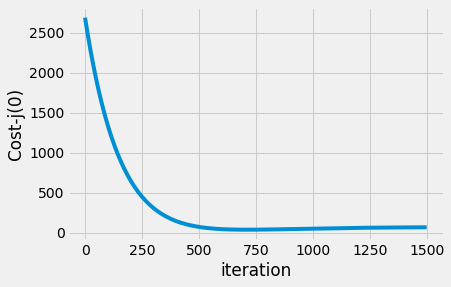

In [13]:
plt.plot(range(1500),j_hist)
plt.xlabel('iteration')
plt.ylabel('Cost-j(0)')

In [14]:
y_predict = predict(X[:,1],theta)  #predict the values using theta values

Text(0, 0.5, 'y')

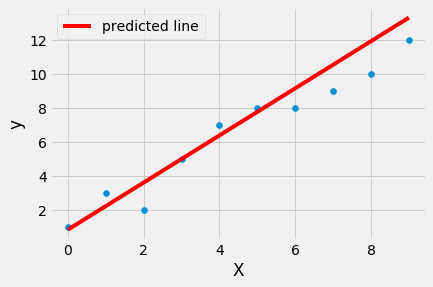

In [15]:
plt.scatter(X[:,1],y)
plt.plot(X[:,1],y_predict,c='r')
plt.legend(['predicted line'])
plt.xlabel('X')
plt.ylabel('y')

In [57]:
thetavec,j_hist_vec,t_hist_vec = gredientdescitrvec(X,y,thetainit,alpha,1500) 


In [58]:
print('Final values of theta after applying gredient descent: \n',thetavec)
print('\nFinal cost of function using the theta values : \n',j_hist_vec[-1])

Final values of theta after applying gredient descent: 
 [[0.25239303]
 [1.30964936]]

Final cost of function using the theta values : 
 [42.47305987]


Text(0, 0.5, 'Cost-j(0)')

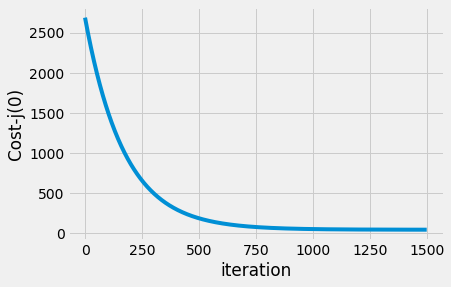

In [59]:
plt.plot(range(1500),j_hist_vec)
plt.xlabel('iteration')
plt.ylabel('Cost-j(0)')

In [60]:
y_predict = predict(X[:,1],thetavec)  #predict the values using theta values

Text(0, 0.5, 'y')

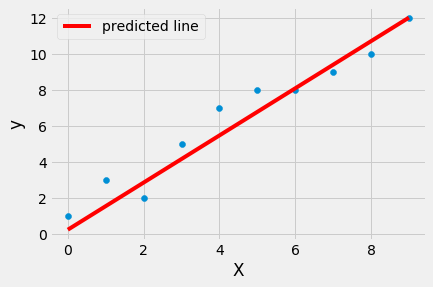

In [61]:
plt.scatter(X[:,1],y)
plt.plot(X[:,1],y_predict,c='r')
plt.legend(['predicted line'])
plt.xlabel('X')
plt.ylabel('y')

In [62]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [63]:
print(linreg.intercept_)
print(linreg.coef_)



[1.23636364]
[[0.         1.16969697]]


In [26]:
y_pred = linreg.predict(X)


Text(0, 0.5, 'y')

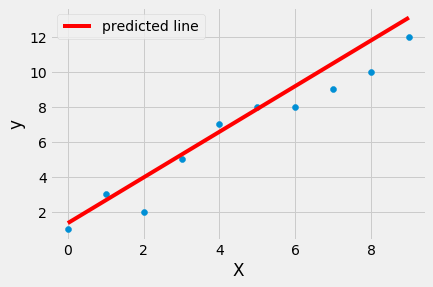

In [27]:
plt.scatter(X[:,1],y)
plt.plot(X[:,1],y_predict,c='r')
plt.legend(['predicted line'])
plt.xlabel('X')
plt.ylabel('y')

In [32]:
print(computecost(X,y,np.array([1.23636364,1.16969697]).reshape(2,1)))

28.121212121212107
